# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Importando as bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Carregando a Base de Dados

In [ ]:
connect_dw_imoveis = sqlite3.connect("imoveis_dw.db")

In [ ]:
data = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

DatabaseError: ignored

In [ ]:
data.head()

NameError: ignored

Exibindo as informações da base de dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


Análise Estatística Básica.

In [ ]:
data.describe()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,5.298167,0.777778,0.243734,3896.247194,1.174022e+03,366.704358,53.300879
std,537.016942,1.171266,1.407198,1.589521,5.888747,0.415759,0.429354,3408.545518,1.559231e+04,3107.832321,47.768031
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,450.000000,0.000000e+00,0.000000,3.000000
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1530.000000,1.700000e+02,38.000000,21.000000
50%,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2661.000000,5.600000e+02,125.000000,36.000000
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,5000.000000,1.237500e+03,375.000000,68.000000
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,45000.000000,1.117000e+06,313700.000000,677.000000


Verificando a correlação dos atributos

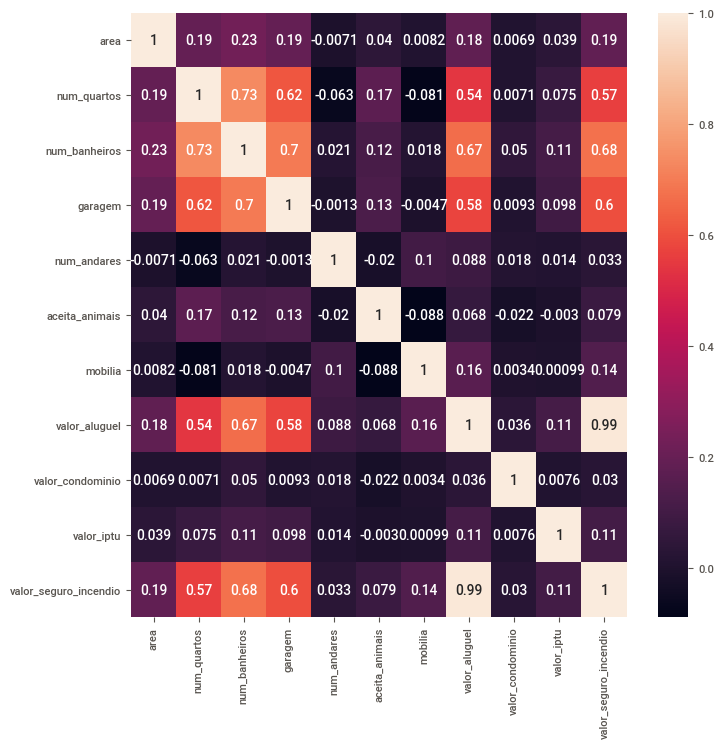

In [ ]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

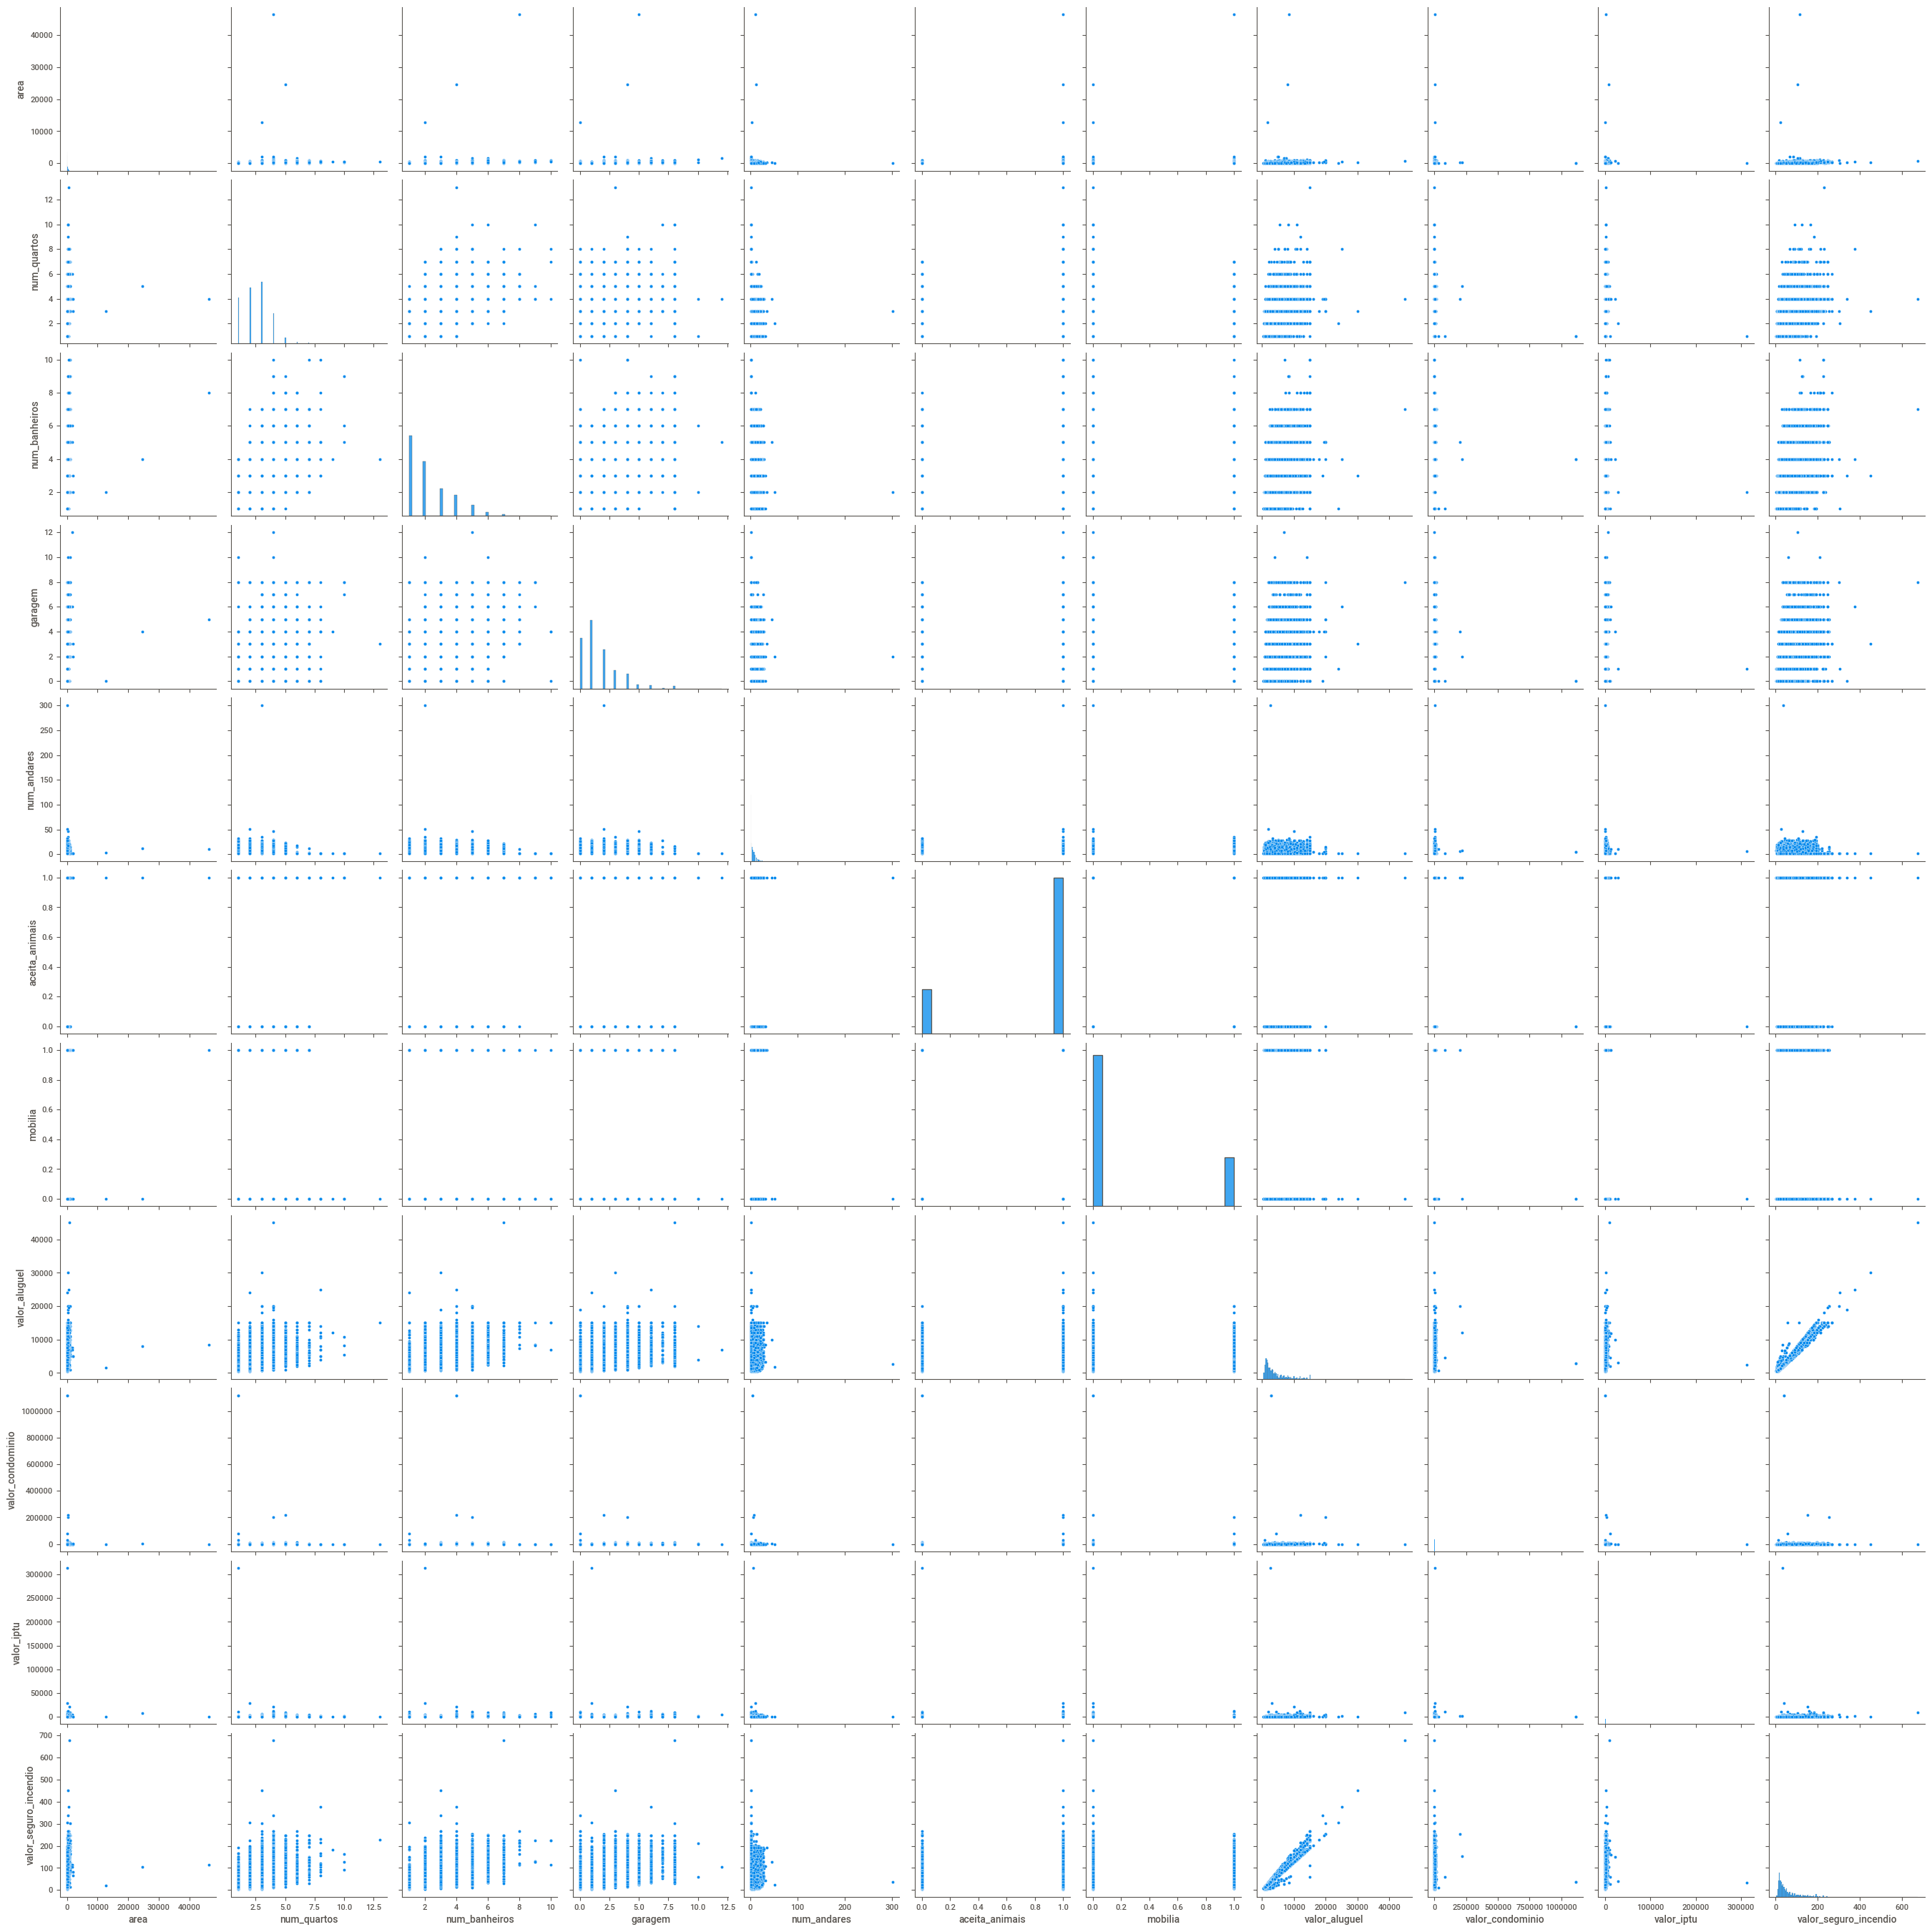

In [ ]:
sns.pairplot(data)

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(data,"valor_aluguel")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



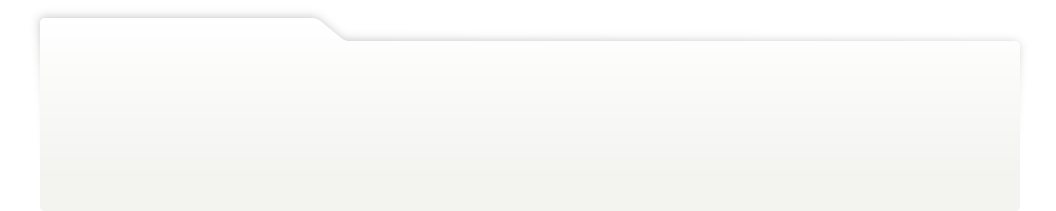
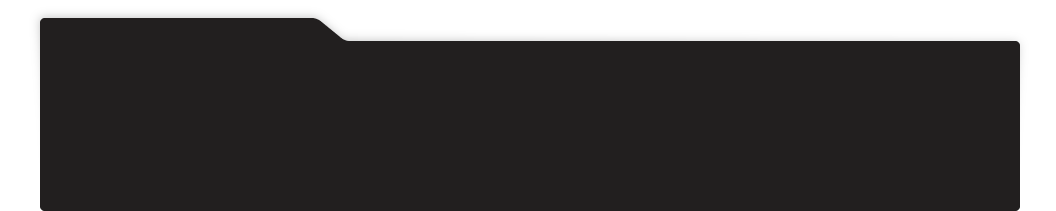
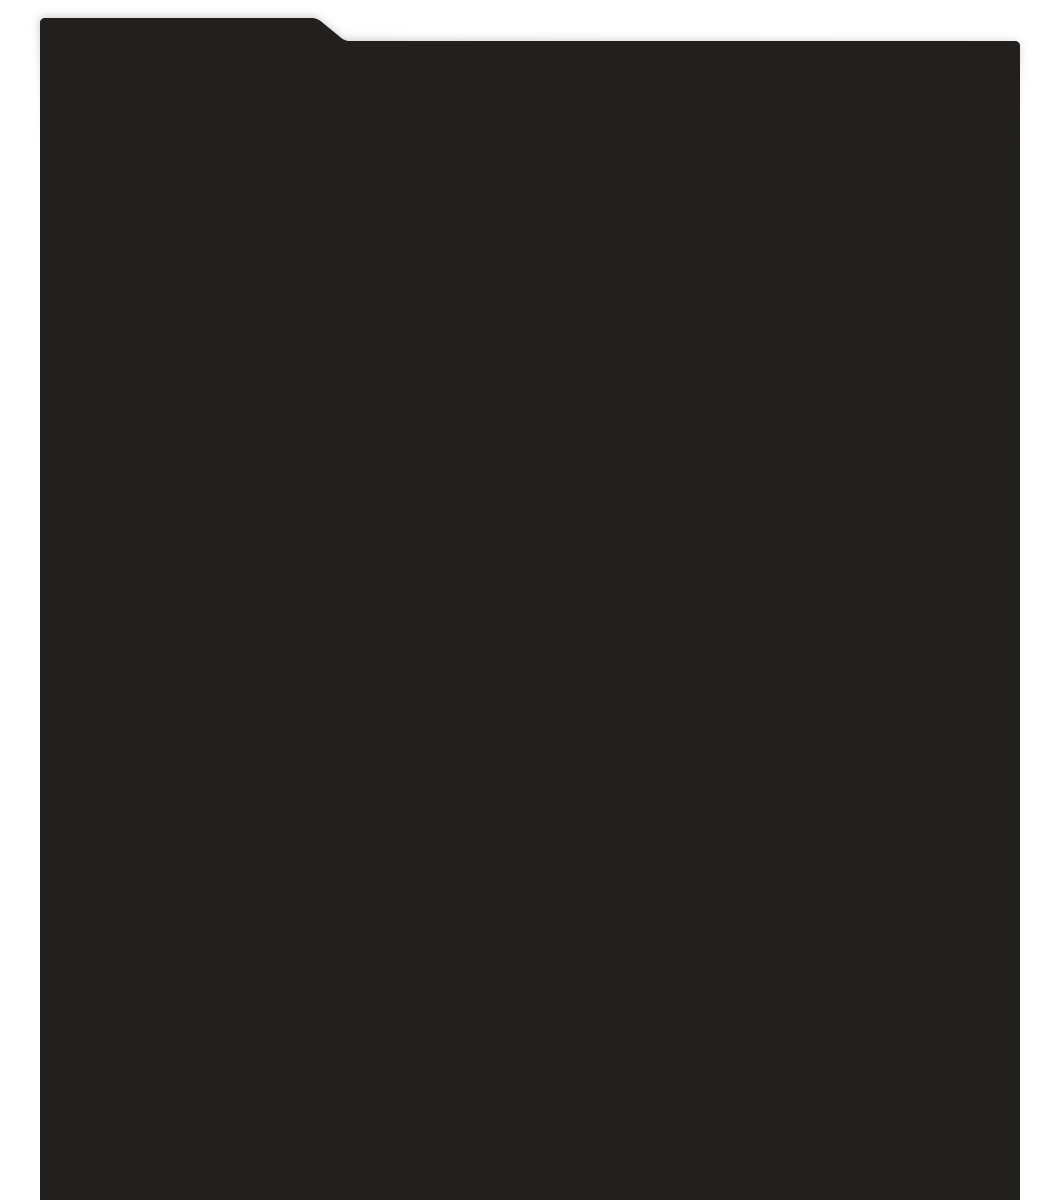
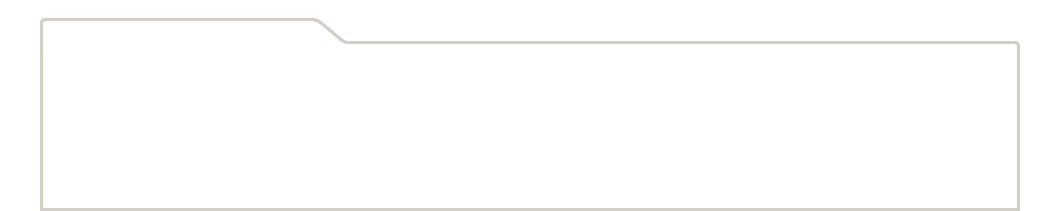
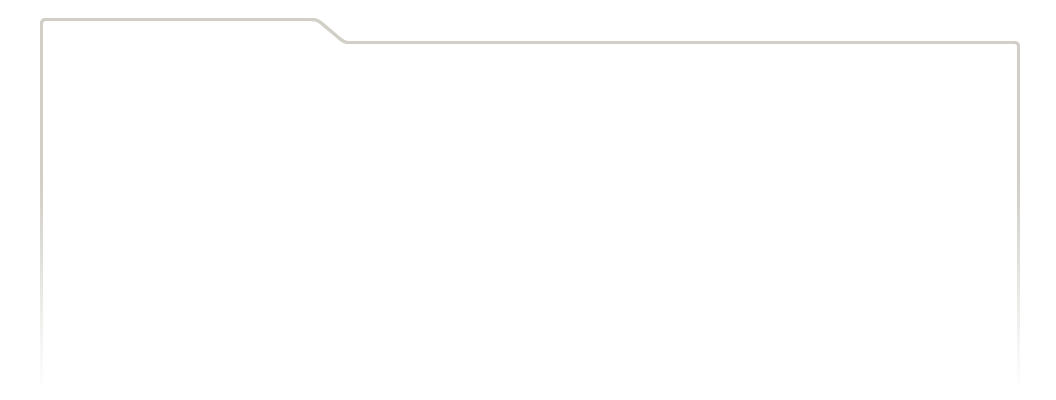
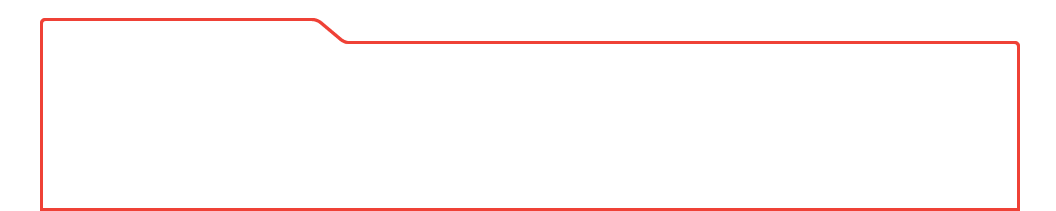
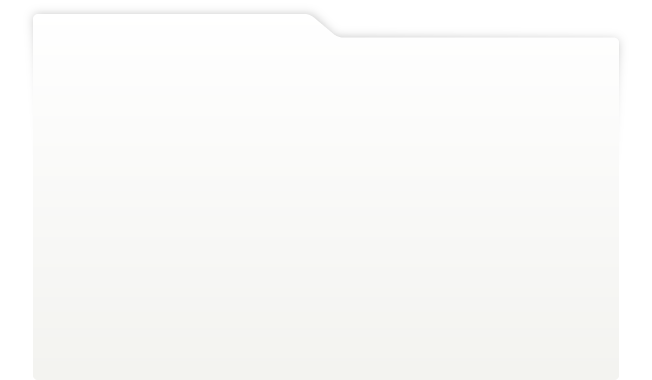
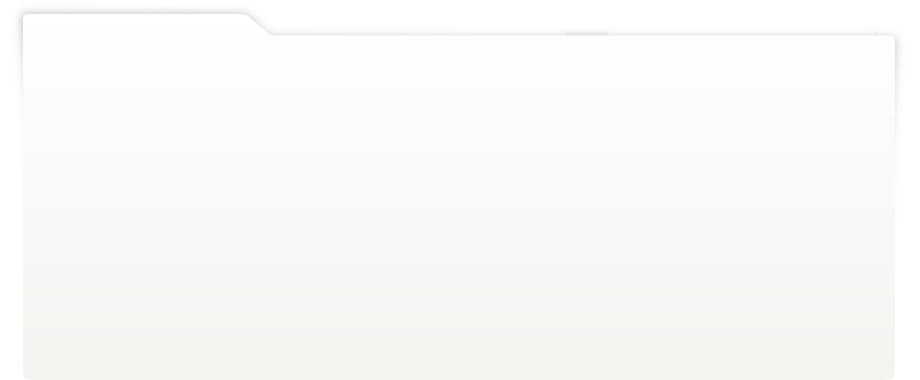
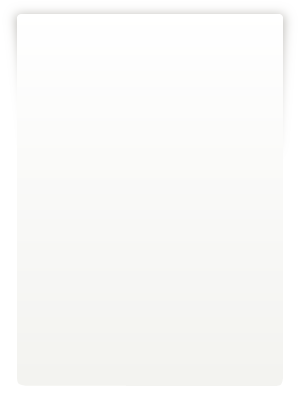
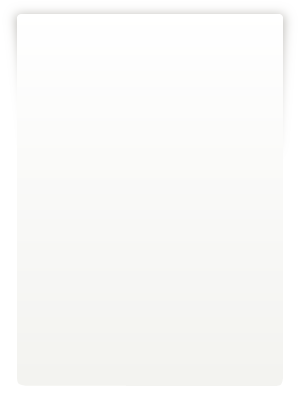
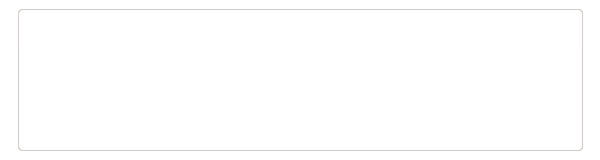
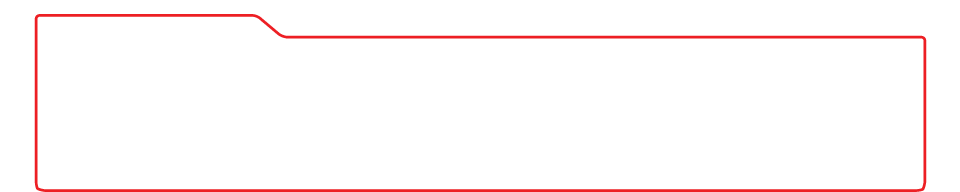
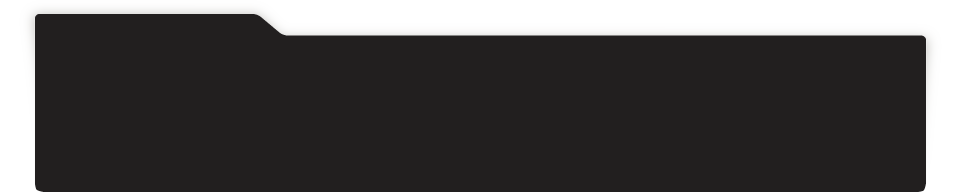
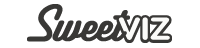
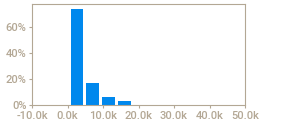
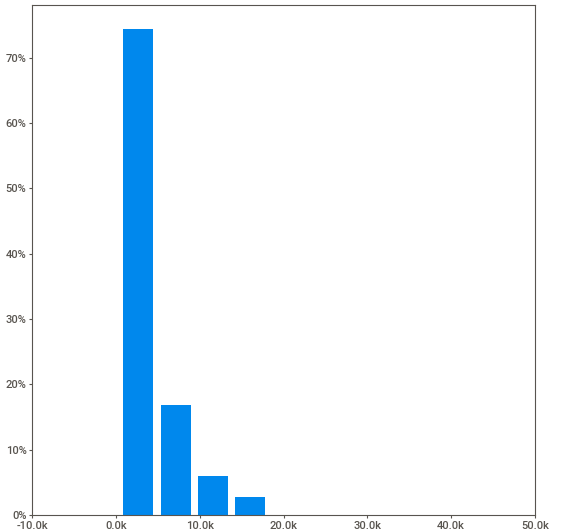
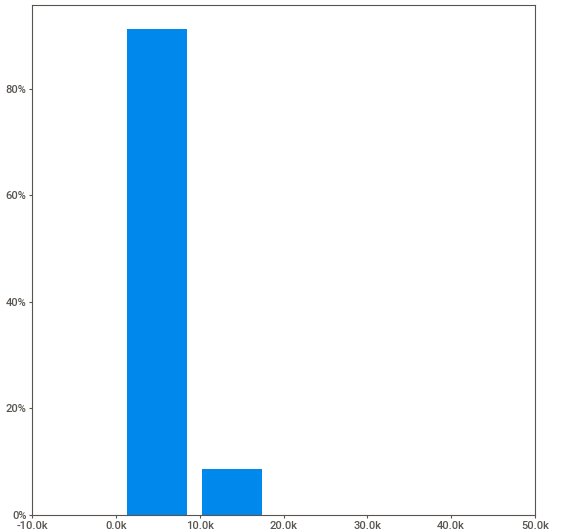
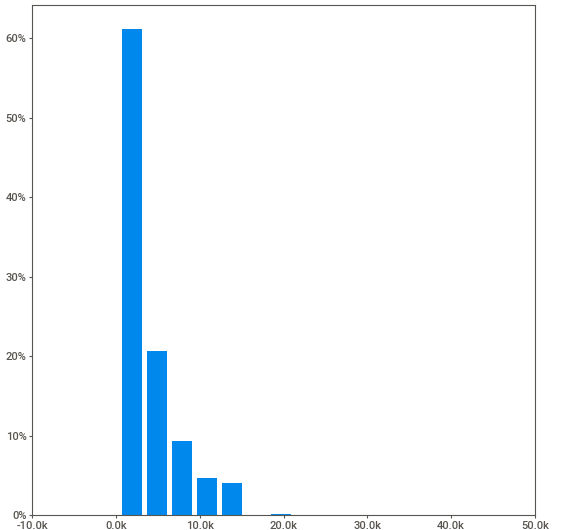
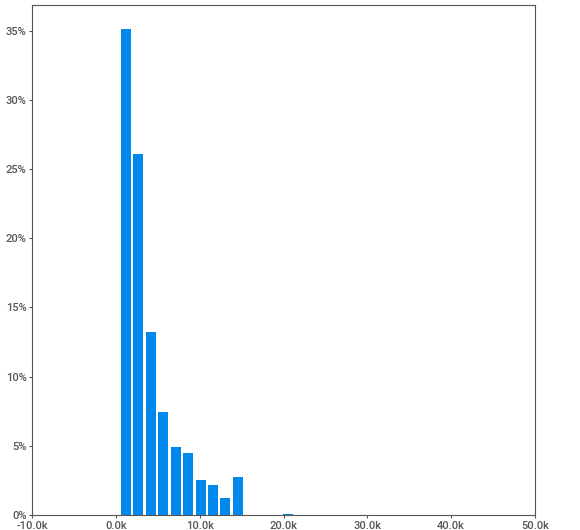
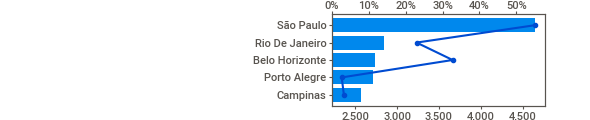
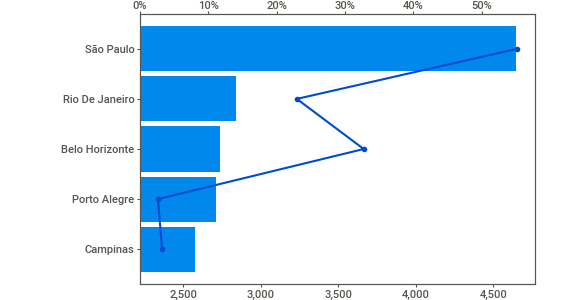
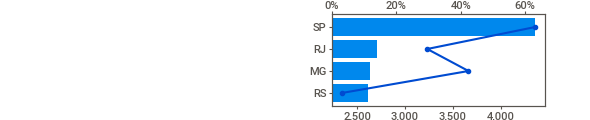
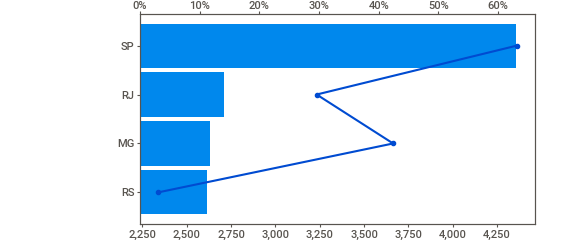
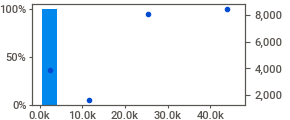
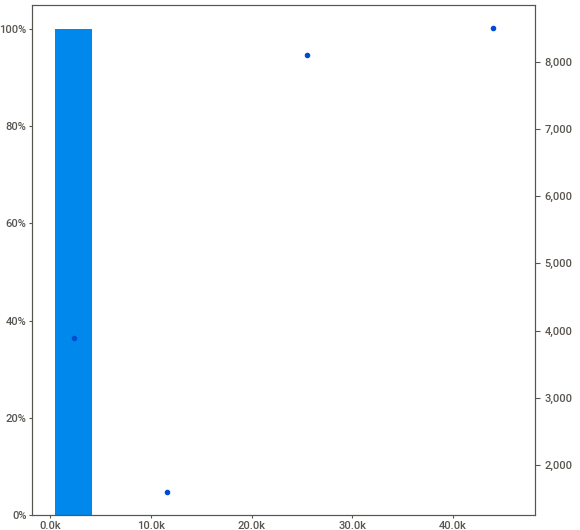
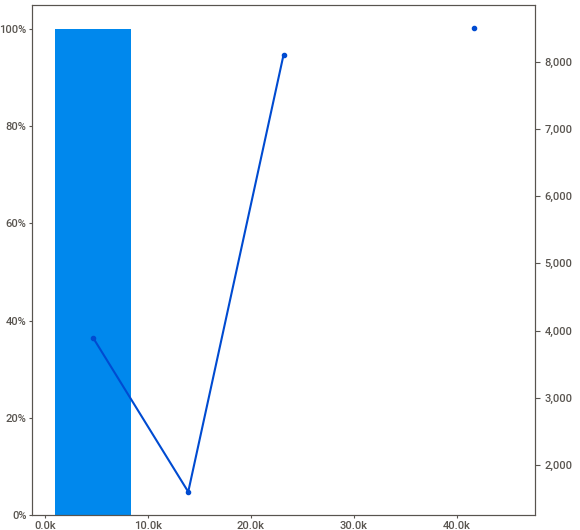
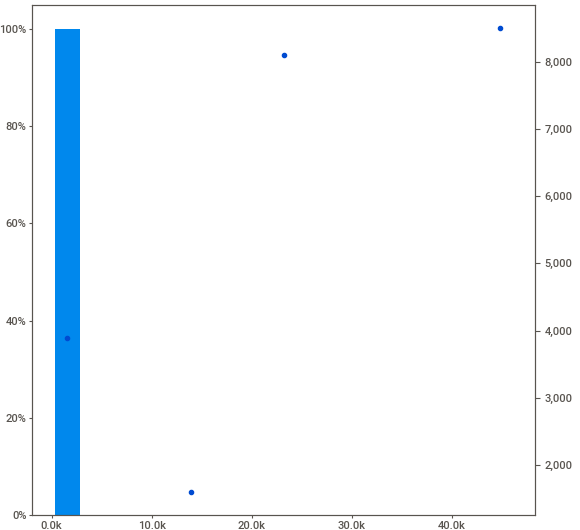
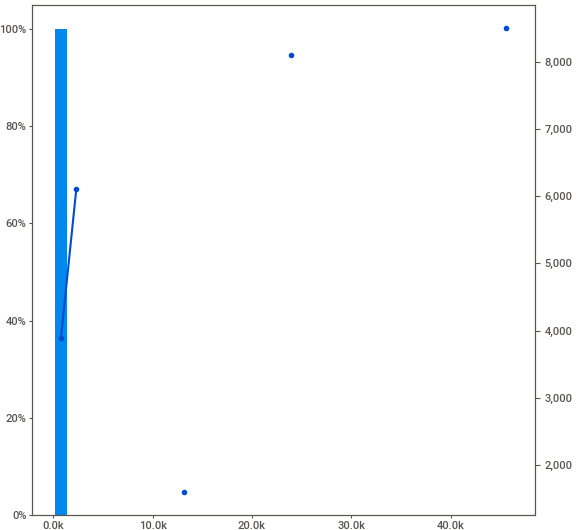
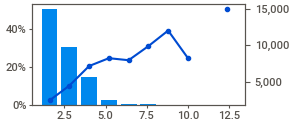
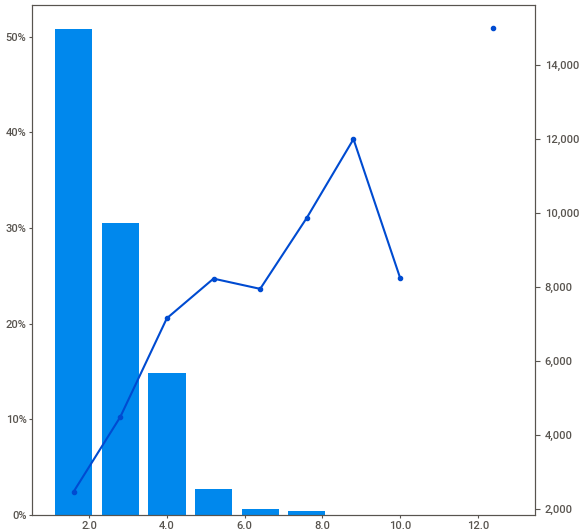
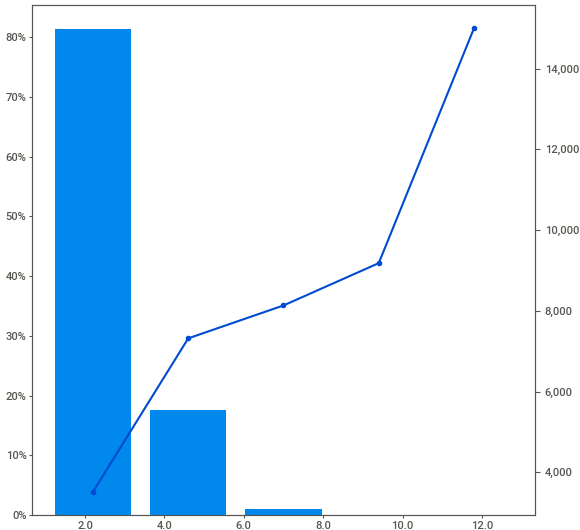
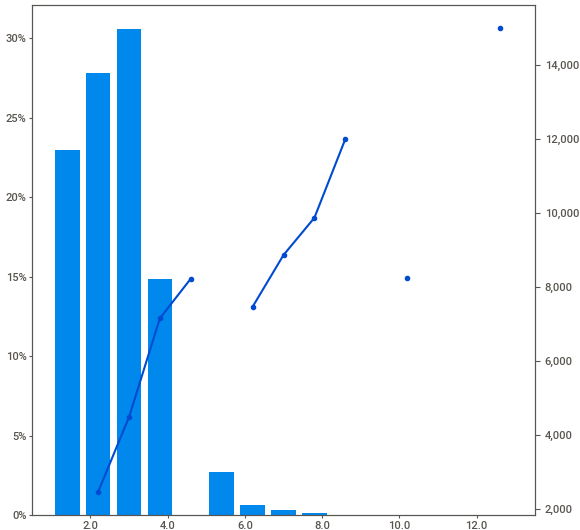
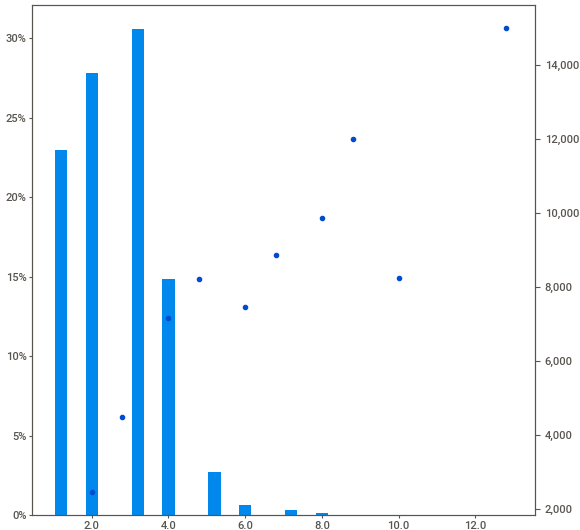
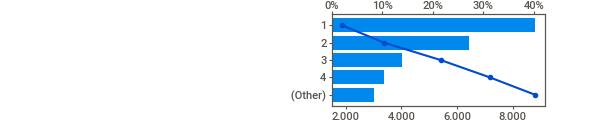
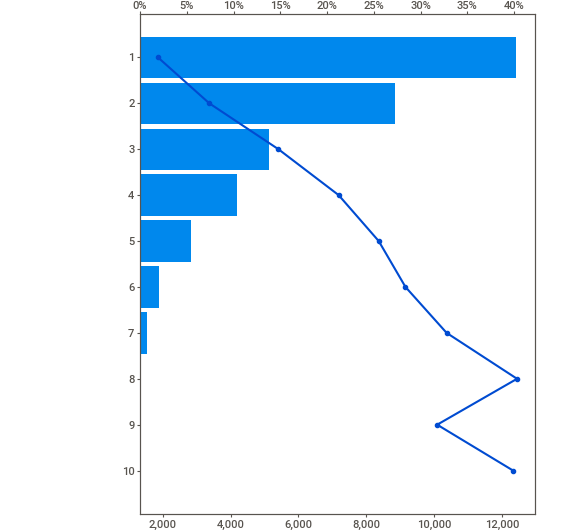
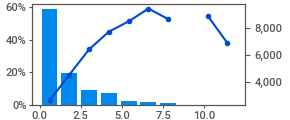
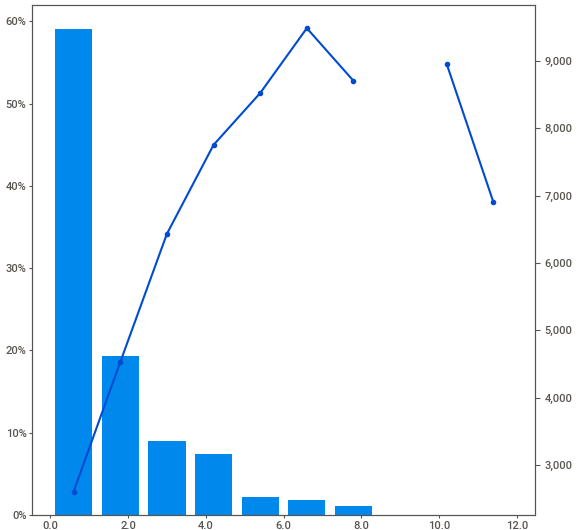
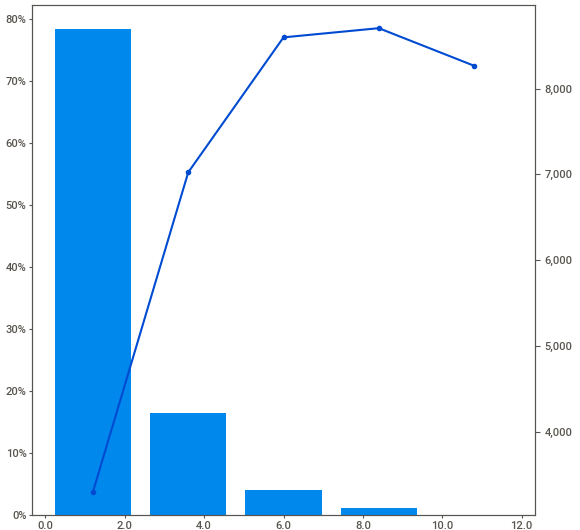
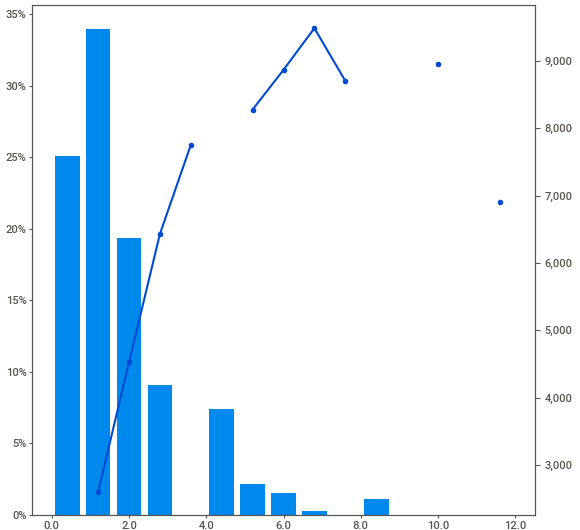
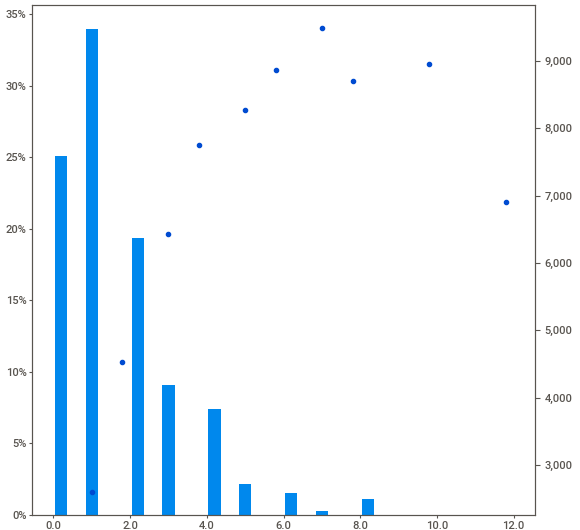
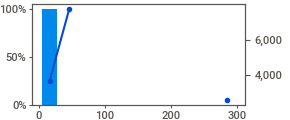
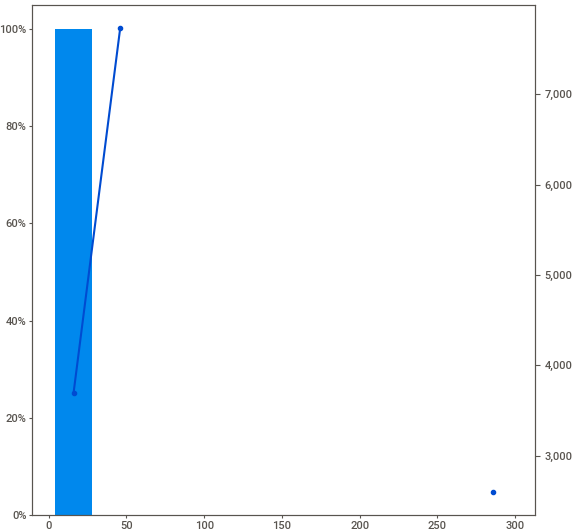
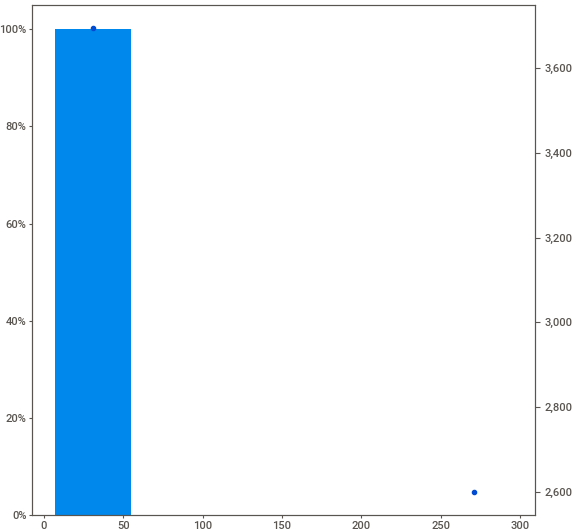
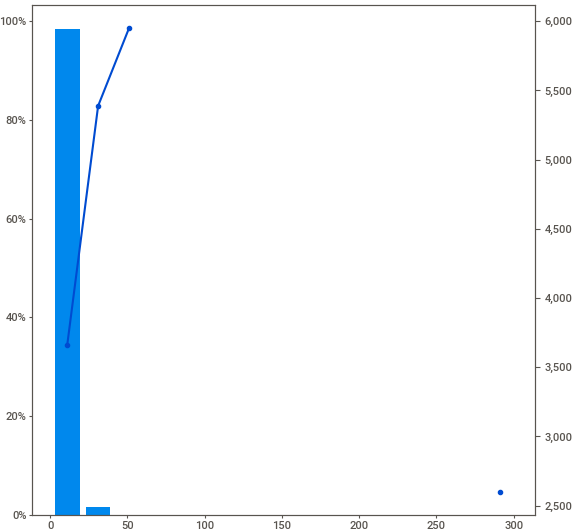
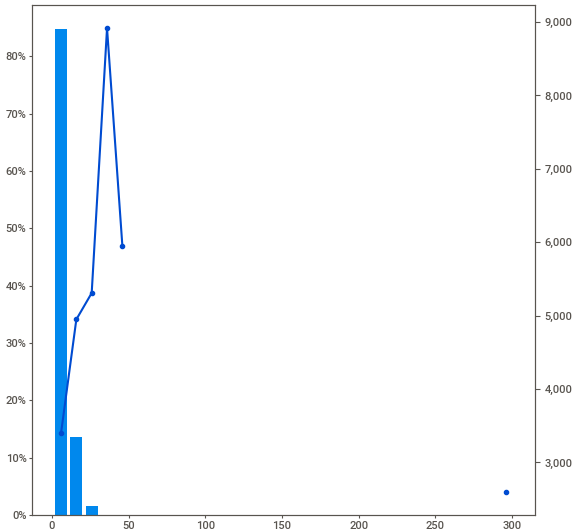
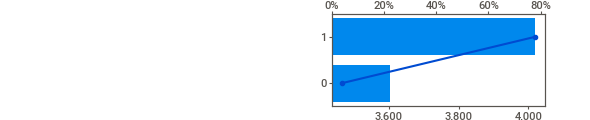
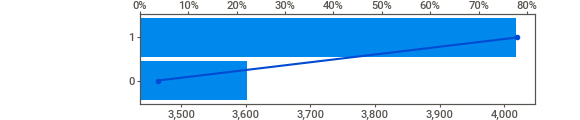
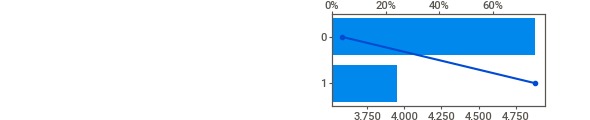
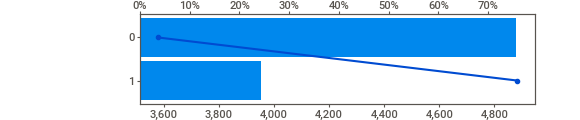
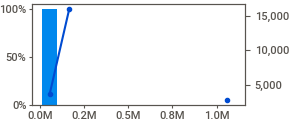
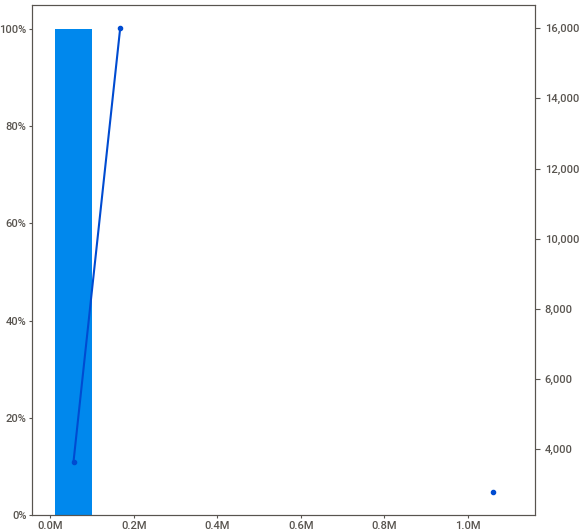
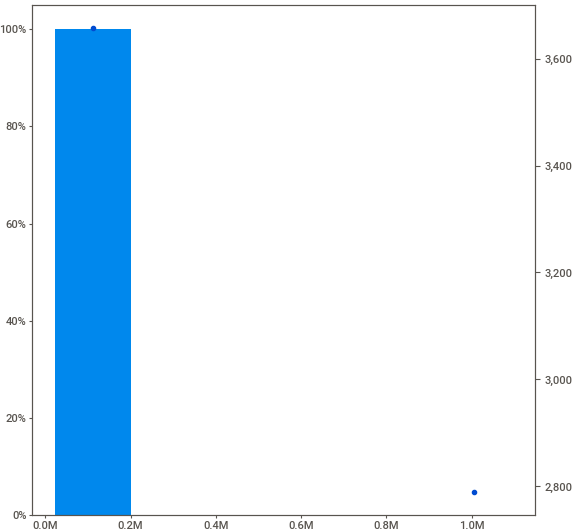
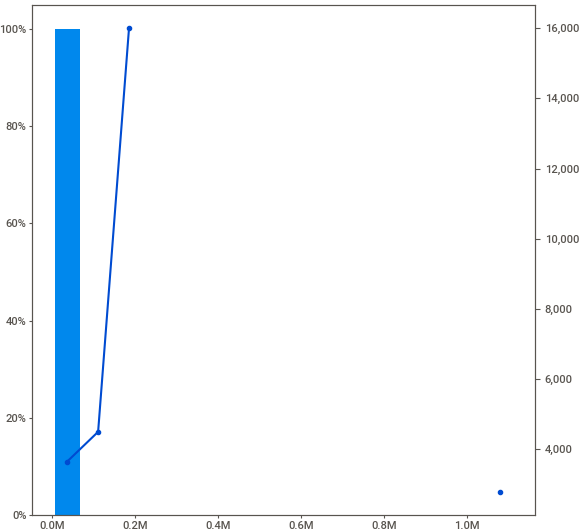
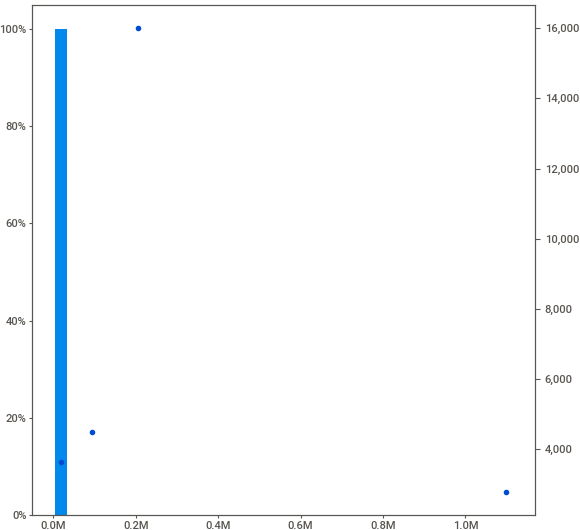
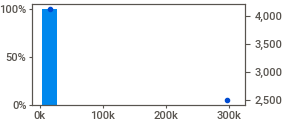
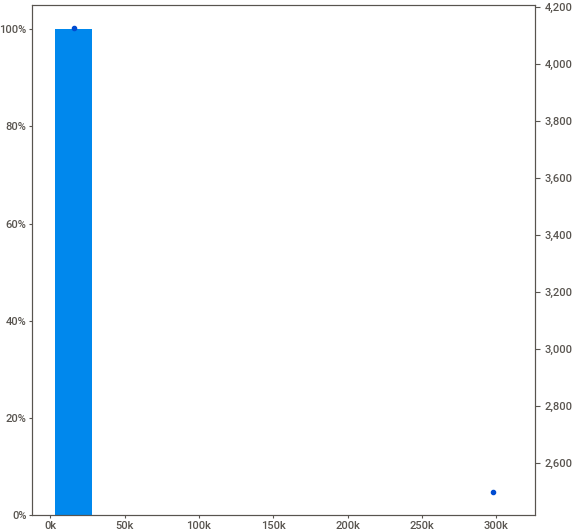
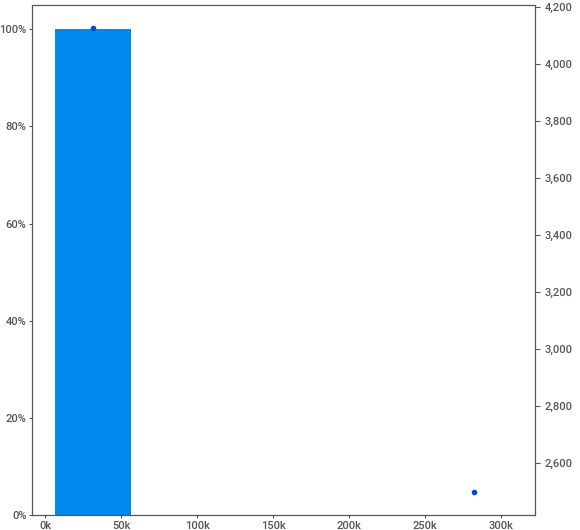
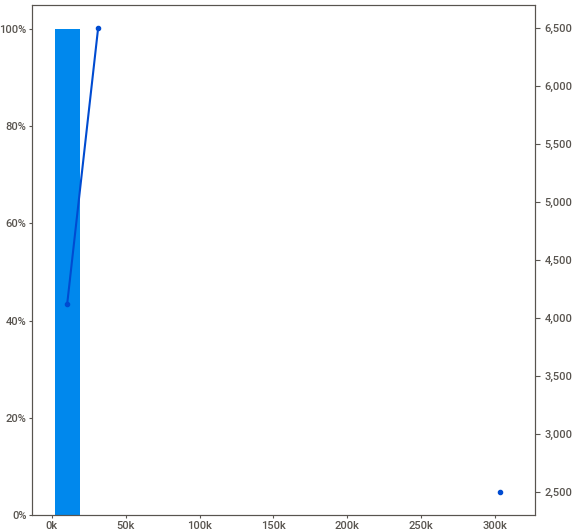
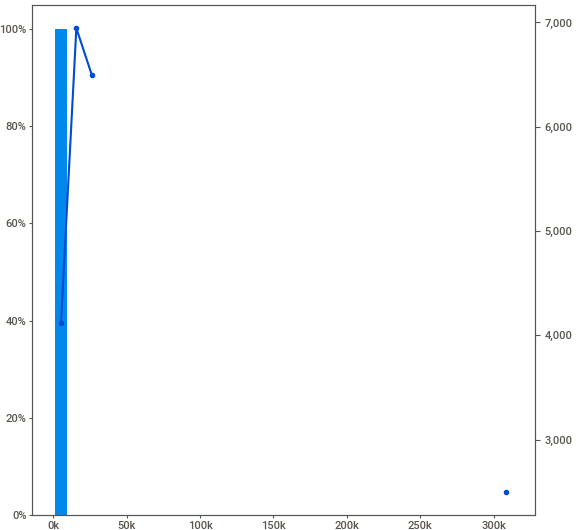
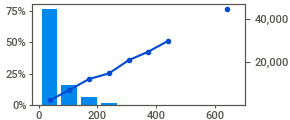
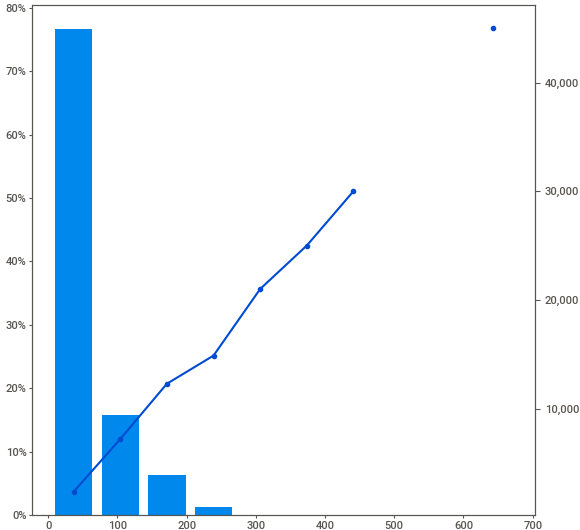
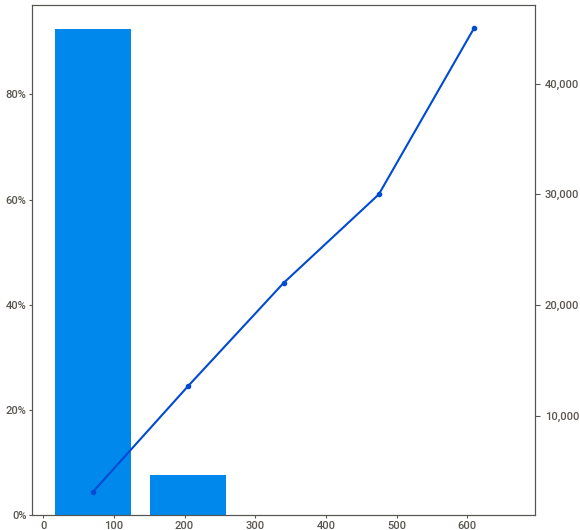
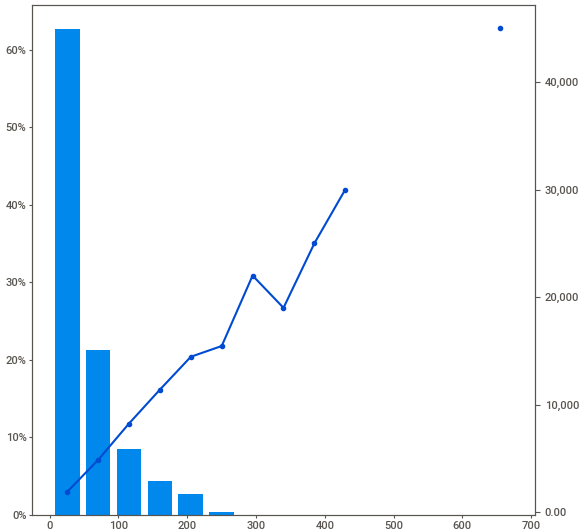
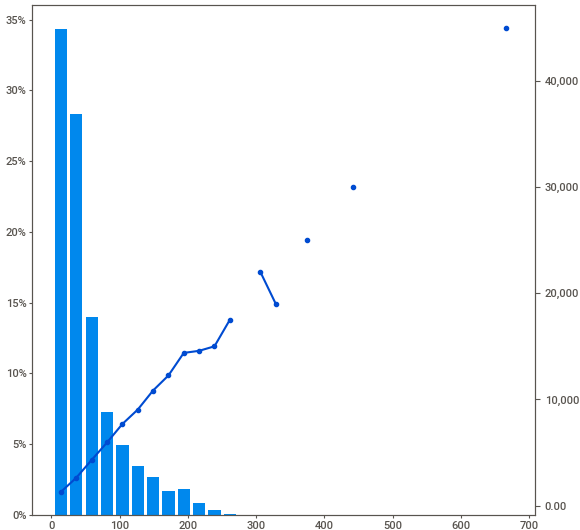
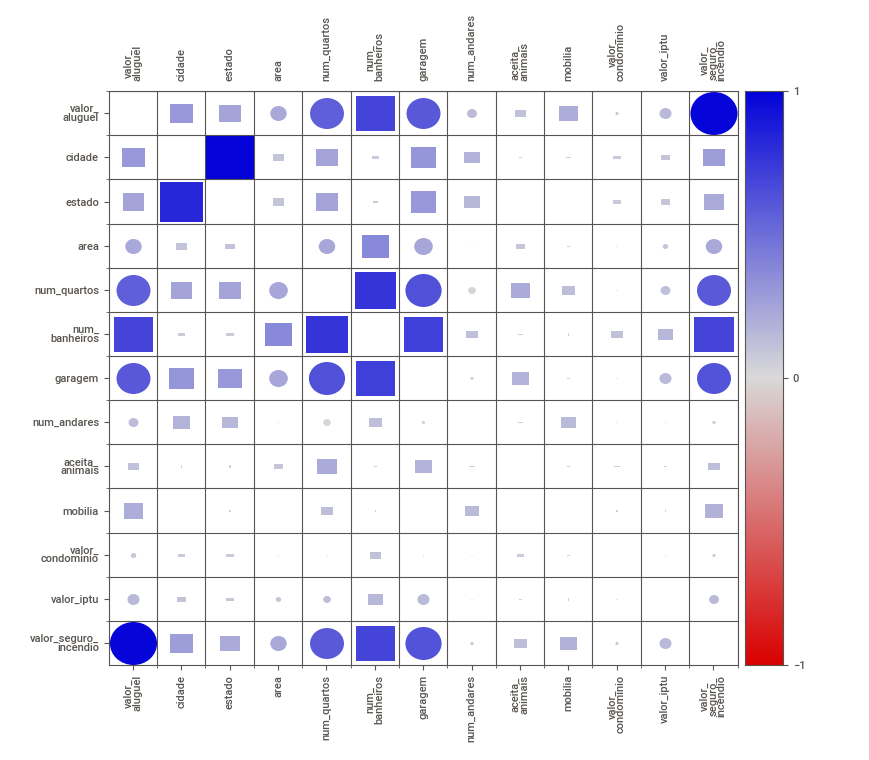
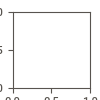

In [ ]:
my_report.show_notebook()

# Como os valores de aluguel estão distribuidos?

Intalando o plotly para visualizações dinamicas

In [ ]:
!pip3 install plotly

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="valor_aluguel", marginal="rug", hover_data=data.columns)
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(data, x="valor_aluguel", points="all")
fig.show()

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 15.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

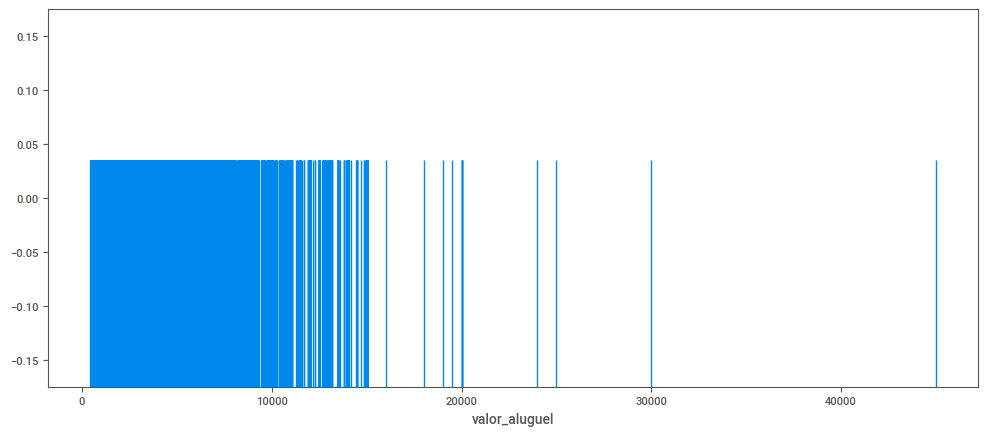

In [ ]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

FloatingPointError: ignored

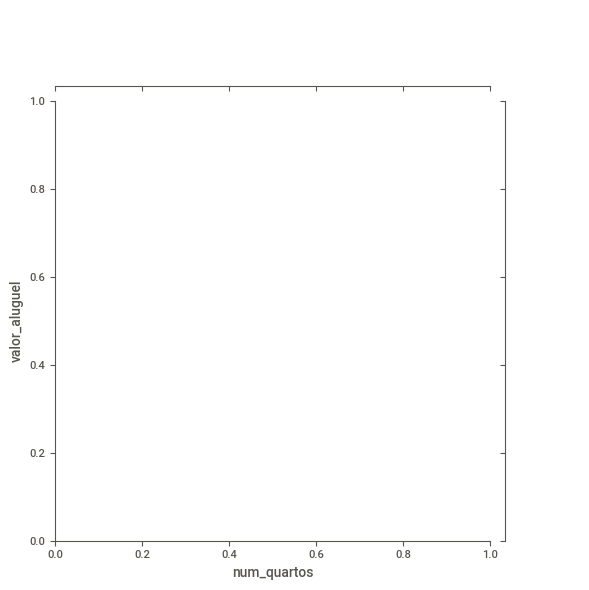

In [ ]:
sns.jointplot(y= data['valor_aluguel'],x = data['num_quartos'],kind ='reg')

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

In [ ]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

In [ ]:
data.head()

* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [ ]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"})

In [ ]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [ ]:
pd.DataFrame(data['cidade'].unique())

In [ ]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

In [ ]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

In [ ]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [ ]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

In [ ]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?

In [ ]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['garagem'],y = data['valor_aluguel'])

In [ ]:
plt.figure(figsize =(6,4))
sns.displot(x = data['garagem'], kde = True)

Existe uma pequena correlação entre o número de vagas de garagem e o valor do aluguel.

# Vamos analisar o seguro incêndio

In [ ]:
sns.violinplot(x ='cidade', y ='valor_seguro_incendio', data = data,hue ='cidade')

* São Paulo é a cidade com os maiores valores de seguro incêndio, seguido por Porto Alegre, Belo Horizonte, Rio de Janeiro e Campinas.

In [ ]:
ax = sns.regplot(x = data['valor_seguro_incendio'],y = data['valor_aluguel'])

* Existe uma alta correlação entre o valor do seguro incendio e o valor do aluguel. 
* Quanto maior o valor do seguro incendio maior o valor do aluguel.

# Existe qualquer relação entre o valor do iptu e o valor do aluguel?

In [ ]:
sns.jointplot(y= data['valor_aluguel'],x = data['valor_iptu'],kind ='reg')

* Não temos nenhum impacto

**Pré-processando os dados**

Poucos algoritmos trabalham com dados categóricos, por essas variáveis serem importantes para o nosso modelo precisamos transformar dados categóricos em dados numéricos para poder usar os algoritmos de Machine Learning

Podemos usar duas técnicas bem eficientes que são:

- **Label Encoder**
- **One Hot Enconder**

Verificando a quantidade de valores únicos na coluna estado

In [ ]:
data.estado.unique()

Verificando a quantidade de valores únicos na coluna cidade

In [ ]:
data.cidade.unique()

**Aplicando o One Hot Encoder**

Subistituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [ ]:
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [ ]:
data.head()

In [ ]:
data.columns

# Detecção de Outliers, Machine Learning

Excluindo os atributos categoricos

In [ ]:
data.drop(["animal_categorical","mobilia_categorical"], axis=1, inplace=True)

Outlier Detection

Verificando os registros anomalos no atributo valor_aluguel

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['valor_aluguel'])
plt.show()

Quantil 1 = 25% dos dados.

In [ ]:
Q1 = data["valor_aluguel"].quantile(.25)

Quantil 3 = 75% dos dados.

In [ ]:
Q3 = data["valor_aluguel"].quantile(.75)

In [ ]:
Q1,Q3

Faixa de Intervalo Interqualítico

In [ ]:
IQR = Q3 - Q1

In [ ]:
IQR

Calculando os limites

In [ ]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
lower,upper

Definindo a seleção dos registros

In [ ]:
data_clean = data[data['valor_aluguel'] >= lower] 

In [ ]:
data_clean = data_clean[data_clean['valor_aluguel'] <= upper]

In [ ]:
data_clean.describe()

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Com Outliers')
sns.boxplot(x= data['valor_aluguel'])

plt.subplot(1, 2, 2)
plt.title('Sem Outliers')
sns.boxplot(x= data_clean['valor_aluguel'])

plt.tight_layout(pad=1.0)
plt.show()

In [ ]:
data_clean.describe()

Unificando os dataframes

In [ ]:
data = data_clean

# Machine Learning

Separando os dados em features e classes.

In [ ]:
y = data['valor_aluguel']
x = data.drop(['valor_aluguel'],axis =1)

Separando os conjuntos de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [ ]:
acc=[]

**Calculando a nossa Baseline**

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
model = DummyRegressor(strategy="median")

Iniciando o treinamento.

In [ ]:
model.fit(X_train,y_train)

Fazendo as predições

In [ ]:
preds = model.predict(X_test)

Calculando as métricas.

In [ ]:
calcula_metricas(y_test,preds)

Armazendo o resultado.

In [ ]:
acc.append(
            [
              'BAS', r2_score(y_test,preds)
            ]
          )

In [ ]:
acc

#### Treinando um modelo de Regressão Linear

Instanciando o estimator.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

Iniciando o treinamento.

In [ ]:
model.fit(X_train,y_train)

Fazendo as predições

In [ ]:
preds = model.predict(X_test)

Calculando as métricas.

In [ ]:
calcula_metricas(y_test,preds)

Armazendo o resultado.

In [ ]:
acc.append(
            [
              'LIR', r2_score(y_test,preds)
            ]
          )

In [ ]:
acc

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Iniciando o treinamento.

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

Fazendo as predições

In [ ]:
preds = model.predict(X_test)

Calculando as métricas.

In [ ]:
calcula_metricas(y_test,preds)

Armazendo o resultado.

In [ ]:
acc.append(['DTR',r2_score(y_test,preds)])

In [ ]:
acc

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Iniciando o treinamento.

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

Fazendo as predições

In [ ]:
preds = model.predict(X_test)

Calculando as métricas.

In [ ]:
calcula_metricas(y_test,preds)

Armazendo o resultado.

In [ ]:
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

In [ ]:
acc

KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Iniciando o treinamento.

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

Fazendo as predições

In [ ]:
preds = model.predict(X_test)

Calculando as métricas.

In [ ]:
calcula_metricas(y_test,preds)

Armazendo o resultado.

In [ ]:
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

In [ ]:
acc

Ordenando os resultados.

In [ ]:
acc.sort(key = lambda y:y[1],reverse =True)

In [ ]:
acc

## Pycaret

In [ ]:
!pip install pycaret==2.2

In [ ]:
from pycaret.regression import *

In [ ]:
numeric_features = ['num_quartos', 'num_banheiros', 'garagem', 'num_andares', 'aceita_animais','mobilia']

In [ ]:
s = setup(data
          ,target = 'valor_aluguel'
          ,numeric_features = [ 'num_quartos'
                               ,'num_banheiros'
                               ,'garagem'
                               ,'num_andares'
                               ,'aceita_animais'
                               ,'mobilia']
          ,log_experiment = True
          ,experiment_name = 'exp-bootcamp'
         )

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:27:20
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling


ValueError: ignored

Vamos comparar os modelos

In [ ]:
best = compare_models(fold = 5)

NameError: ignored

Listando os modelos

In [ ]:
models()

KeyError: ignored

Selecionando o melhor algoritmo

In [ ]:
et = create_model('et', fold = 5)

In [ ]:
print(et)

Otimizando o modelo

In [ ]:
tuned_et = tune_model(et,fold=5)

Visualizando os residuais

In [ ]:
plot_model(et)

Visualizando o erro do modelo

In [ ]:
plot_model(et, plot = 'error')

Visualizando as features importantes

In [ ]:
plot_model(et, plot='feature')

Finaliza o modelo

In [ ]:
final_et = finalize_model(et)

Salva o modelo

In [ ]:
save_model(final_et,'modelo-final')

In [ ]:
!ls

In [ ]:
!mlflow ui